In [37]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: saman8899
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|████████████████████████████████████████████████████████████████████████████████| 653M/653M [14:28<00:00, 788kB/s]


In [3]:
data_filename = './us-accidents/US_Accidents_March23.csv'

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np


In [ ]:
data1 = pd.read_csv(data_filename)
data = data1.sample(n = 10000)
data

In [ ]:
data.info()

In [6]:
data.isnull().sum()

ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  4358
End_Lng                  4358
Distance(mi)                0
Description                 0
Street                     17
City                        0
County                      0
State                       0
Zipcode                     2
Country                     0
Timezone                    6
Airport_Code               30
Weather_Timestamp         149
Temperature(F)            209
Wind_Chill(F)            2599
Humidity(%)               220
Pressure(in)              173
Visibility(mi)            215
Wind_Direction            213
Wind_Speed(mph)           702
Precipitation(in)        2857
Weather_Condition         210
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction  

In [7]:
columns = ['End_Lat', 'End_Lng', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 
    'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 
    'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 
    'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset', 
    'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

data_cleaned = data.dropna(subset = columns)
data_cleaned



,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
4437433,A-4471042,Source1,2,2022-03-13 00:44:00.000000,2022-03-13 03:47:09.000000,32.812332,-96.791171,32.800982,-96.793201,0.793,...,False,False,False,False,False,False,Night,Night,Night,Night
4947393,A-4984895,Source1,2,2022-05-05 16:00:00.000000000,2022-05-05 17:50:00.000000000,33.251576,-84.245890,33.250861,-84.248298,0.148,...,False,False,False,False,False,False,Day,Day,Day,Day
5747136,A-5790286,Source1,2,2021-04-23 18:58:19,2021-04-23 20:20:43,38.877600,-76.979388,38.878090,-76.991528,0.654,...,False,False,False,False,False,False,Day,Day,Day,Day
6713508,A-6762370,Source1,2,2020-12-03 13:17:30,2020-12-04 02:02:00,30.463723,-86.562610,30.469595,-86.562463,0.406,...,False,False,False,False,False,False,Day,Day,Day,Day
7134289,A-7183641,Source1,2,2020-04-17 06:59:30,2020-04-17 07:31:31,33.944850,-118.099160,33.944850,-118.099160,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681932,A-4717457,Source1,2,2022-11-16 22:09:00,2022-11-16 23:32:42,33.744775,-117.980922,33.744665,-117.980912,0.008,...,False,False,False,False,True,False,Night,Night,Night,Night
4090891,A-4121663,Source1,2,2023-01-24 08:41:03,2023-01-24 10:10:00,44.964760,-93.244255,44.966158,-93.257444,0.652,...,False,False,False,False,False,False,Day,Day,Day,Day
5086751,A-5125330,Source1,2,2022-07-27 09:38:00,2022-07-27 11:02:06,28.916015,-82.111253,28.957380,-82.122147,2.933,...,False,False,False,False,False,False,Day,Day,Day,Day
5950022,A-5994407,Source1,2,2021-06-22 07:09:43.000000000,2021-06-22 10:17:47.000000000,33.762325,-79.007531,33.763414,-79.005705,0.129,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
df1 = data.dropna()
df1

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
4437433,A-4471042,Source1,2,2022-03-13 00:44:00.000000,2022-03-13 03:47:09.000000,32.812332,-96.791171,32.800982,-96.793201,0.793,...,False,False,False,False,False,False,Night,Night,Night,Night
4947393,A-4984895,Source1,2,2022-05-05 16:00:00.000000000,2022-05-05 17:50:00.000000000,33.251576,-84.245890,33.250861,-84.248298,0.148,...,False,False,False,False,False,False,Day,Day,Day,Day
5747136,A-5790286,Source1,2,2021-04-23 18:58:19,2021-04-23 20:20:43,38.877600,-76.979388,38.878090,-76.991528,0.654,...,False,False,False,False,False,False,Day,Day,Day,Day
6713508,A-6762370,Source1,2,2020-12-03 13:17:30,2020-12-04 02:02:00,30.463723,-86.562610,30.469595,-86.562463,0.406,...,False,False,False,False,False,False,Day,Day,Day,Day
7134289,A-7183641,Source1,2,2020-04-17 06:59:30,2020-04-17 07:31:31,33.944850,-118.099160,33.944850,-118.099160,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681932,A-4717457,Source1,2,2022-11-16 22:09:00,2022-11-16 23:32:42,33.744775,-117.980922,33.744665,-117.980912,0.008,...,False,False,False,False,True,False,Night,Night,Night,Night
4090891,A-4121663,Source1,2,2023-01-24 08:41:03,2023-01-24 10:10:00,44.964760,-93.244255,44.966158,-93.257444,0.652,...,False,False,False,False,False,False,Day,Day,Day,Day
5086751,A-5125330,Source1,2,2022-07-27 09:38:00,2022-07-27 11:02:06,28.916015,-82.111253,28.957380,-82.122147,2.933,...,False,False,False,False,False,False,Day,Day,Day,Day
5950022,A-5994407,Source1,2,2021-06-22 07:09:43.000000000,2021-06-22 10:17:47.000000000,33.762325,-79.007531,33.763414,-79.005705,0.129,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
df1.shape

(4639, 46)

In [10]:
df1.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000,4639.000000
mean,2.085363,36.165323,-95.028491,36.166020,-95.028996,0.840033,60.817719,59.423561,63.451822,29.359573,9.060166,7.397607,0.005439
std,0.409618,5.332734,17.993915,5.333251,17.994068,2.134216,19.569464,21.911983,23.079306,1.128405,2.591940,5.370333,0.043105
min,1.000000,25.440563,-124.415065,25.440515,-124.415299,0.000000,-18.000000,-33.000000,4.000000,20.210000,0.000000,0.000000,0.000000
25%,2.000000,33.180407,-117.547185,33.182420,-117.552533,0.071000,47.000000,46.000000,47.000000,29.200000,10.000000,3.000000,0.000000
50%,2.000000,36.077151,-86.810446,36.079482,-86.814560,0.267000,63.000000,63.000000,65.000000,29.720000,10.000000,7.000000,0.000000
75%,2.000000,40.135519,-80.188855,40.137576,-80.188033,0.933000,76.000000,76.000000,83.000000,29.960000,10.000000,10.000000,0.000000
max,4.000000,48.779694,-68.885990,48.784951,-68.885990,101.642000,109.000000,109.000000,100.000000,30.670000,75.000000,40.000000,1.600000


In [11]:
df1.duplicated().sum()

0

In [12]:
df1.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [13]:
cities = df1['City'].unique()
cities

array(['Dallas', 'Griffin', 'Washington', ..., 'Lonoke', 'Midway City',
       'Oxford'], dtype=object)

In [14]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

City
Miami          182
Los Angeles     98
Orlando         86
Dallas          76
Charlotte       64
              ... 
Richardson       1
Suisun City      1
East Islip       1
New Prague       1
Oxford           1
Name: count, Length: 1692, dtype: int64

In [15]:
accidents_by_cities[:10]

City
Miami          182
Los Angeles     98
Orlando         86
Dallas          76
Charlotte       64
Houston         62
Raleigh         52
Sacramento      45
Austin          41
San Diego       37
Name: count, dtype: int64

In [26]:
# Categorical columns
categorical_columns = ['Street', 'City', 'Timezone', 'Airport_Code', 'Weather_Condition', 'Sunrise_Sunset', 
                       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

In [31]:
# Numerical columns (excluding 'Weather_Timestamp' as it is not numeric)
numerical_columns = ['End_Lat', 'End_Lng', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                     'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']


In [35]:

# Impute missing values: Use most frequent for categorical and median for numerical
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

In [39]:
# Strip spaces from column names (if any)
df1.columns = df1.columns.str.strip()

# Check for missing columns
missing_categorical_columns = [col for col in categorical_columns if col not in df1.columns]
missing_numerical_columns = [col for col in numerical_columns if col not in df1.columns]

if missing_categorical_columns or missing_numerical_columns:
    print(f"Missing categorical columns: {missing_categorical_columns}")
    print(f"Missing numerical columns: {missing_numerical_columns}")
else:
    # Impute missing values
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    numerical_imputer = SimpleImputer(strategy='median')

    # Apply imputation to categorical columns
    df1[categorical_columns] = categorical_imputer.fit_transform(df1[categorical_columns])

    # Apply imputation to numerical columns
    df1[numerical_columns] = numerical_imputer.fit_transform(df1[numerical_columns])

    print("Imputation completed successfully.")

Missing categorical columns: ['Street', 'City', 'Timezone', 'Airport_Code', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
Missing numerical columns: []


In [40]:
# Remove duplicate rows
df1 = df1.drop_duplicates()

In [41]:
df1 = df1[(df1['Temperature(F)'] < 150) & (df1['Temperature(F)'] > -100)]
# handling outliers

In [42]:
#Normalize numerical columns (Min-Max Scaling)
scaler = MinMaxScaler()
df1[numerical_columns] = scaler.fit_transform(df1[numerical_columns])

In [44]:
# Strip spaces from column names (if any) to prevent mismatches
df1.columns = df1.columns.str.strip()

# Check the column names after imputation
print("Columns in df1:", df1.columns)

Columns in df1: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       ...
       'Weather_Condition_Snow / Windy', 'Weather_Condition_T-Storm',
       'Weather_Condition_T-Storm / Windy', 'Weather_Condition_Thunder',
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Wintry Mix', 'Sunrise_Sunset_Night',
       'Civil_Twilight_Night', 'Nautical_Twilight_Night',
       'Astronomical_Twilight_Night'],
      dtype='object', length=5530)


In [45]:
# Check for missing categorical columns
missing_categorical_columns = [col for col in categorical_columns if col not in df1.columns]
if missing_categorical_columns:
    print(f"Missing categorical columns: {missing_categorical_columns}")
else:
    print("All categorical columns are present.")


Missing categorical columns: ['Street', 'City', 'Timezone', 'Airport_Code', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [46]:
# One-hot encoding for categorical variables (to handle categorical data in machine learning models)
if not missing_categorical_columns:  # Apply encoding if no columns are missing
    df1 = pd.get_dummies(df1, columns=categorical_columns, drop_first=True)
    print("One-hot encoding applied successfully.")
else:
    print("Cannot apply one-hot encoding due to missing categorical columns.")


Cannot apply one-hot encoding due to missing categorical columns.


In [47]:
# PCA reduces dimensionality while retaining most of the variance
# The number of components can be set to retain a percentage of variance (e.g., 95%)
# Select only the numerical columns for PCA
numerical_columns = df1.select_dtypes(include=['number']).columns
df_numerical = df1[numerical_columns]

# Apply PCA with 95% variance explained
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_numerical)

# Create a DataFrame from the PCA results
df_pca = pd.DataFrame(df_pca)

# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Explained variance ratio: [0.9081156  0.07837786]


In [48]:

d_road = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

df1[d_road].sum()


Amenity             56
Bump                 4
Crossing           422
Give_Way            14
Junction           374
No_Exit             15
Railway             27
Roundabout           0
Station            119
Stop               117
Traffic_Calming      5
Traffic_Signal     410
Turning_Loop         0
dtype: int64

<Figure size 1200x800 with 0 Axes>

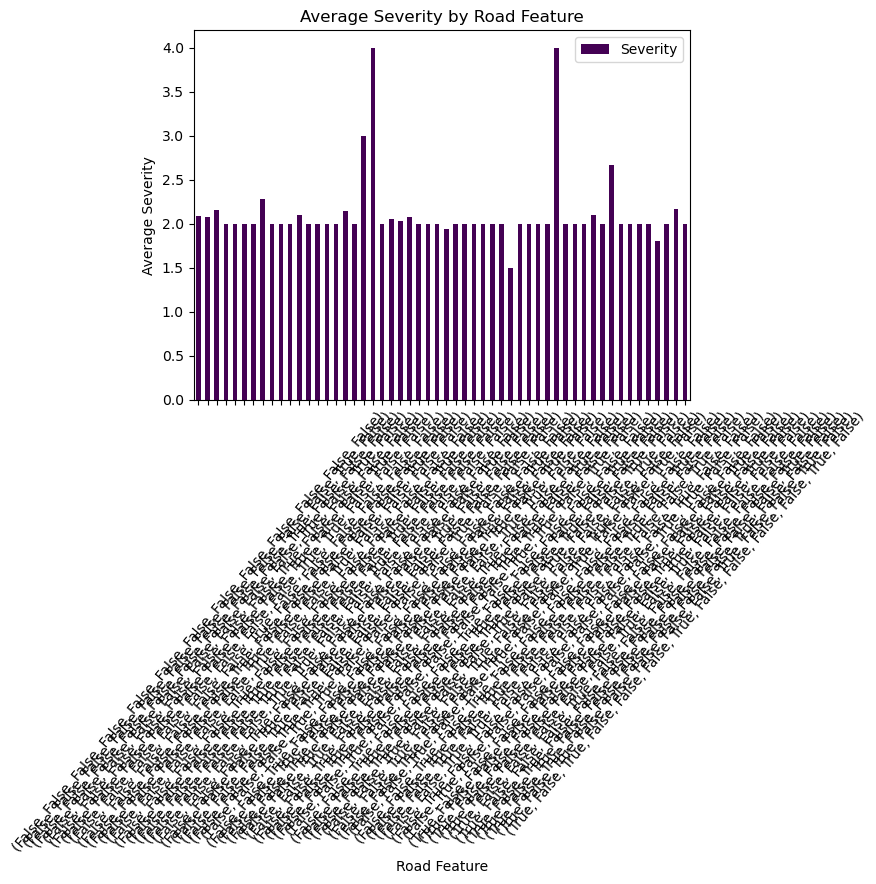

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
severity_by_road = df1.groupby(d_road).agg({'Severity': 'mean'})
severity_by_road
plt.figure(figsize=(12, 8))
severity_by_road.plot(kind='bar', colormap ='viridis')
plt.title('Average Severity by Road Feature')
plt.xlabel('Road Feature')
plt.ylabel('Average Severity')
plt.xticks(rotation= 50)
plt.show()

In [50]:

df1['Start_Time'].dtypes
df1['End_Time'].dtypes


dtype('O')

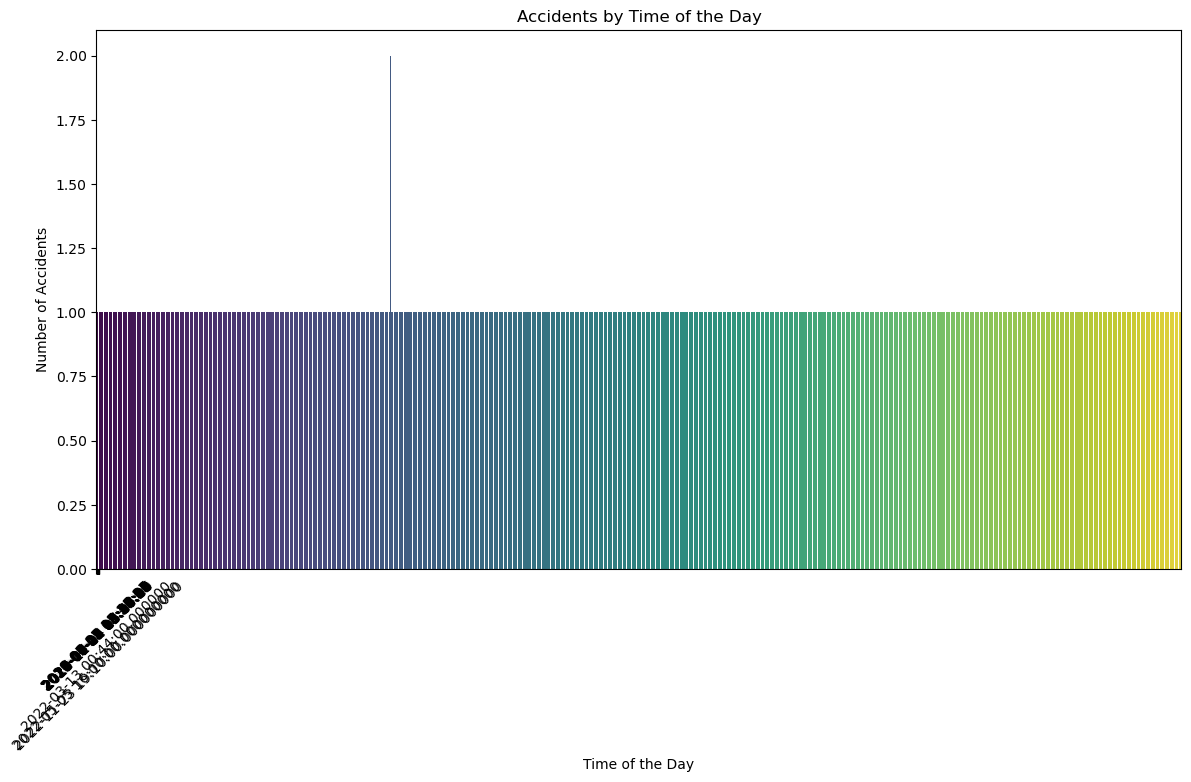

In [51]:


plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='Start_Time', palette='viridis')
plt.title('Accidents by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24), rotation=45)
plt.show()





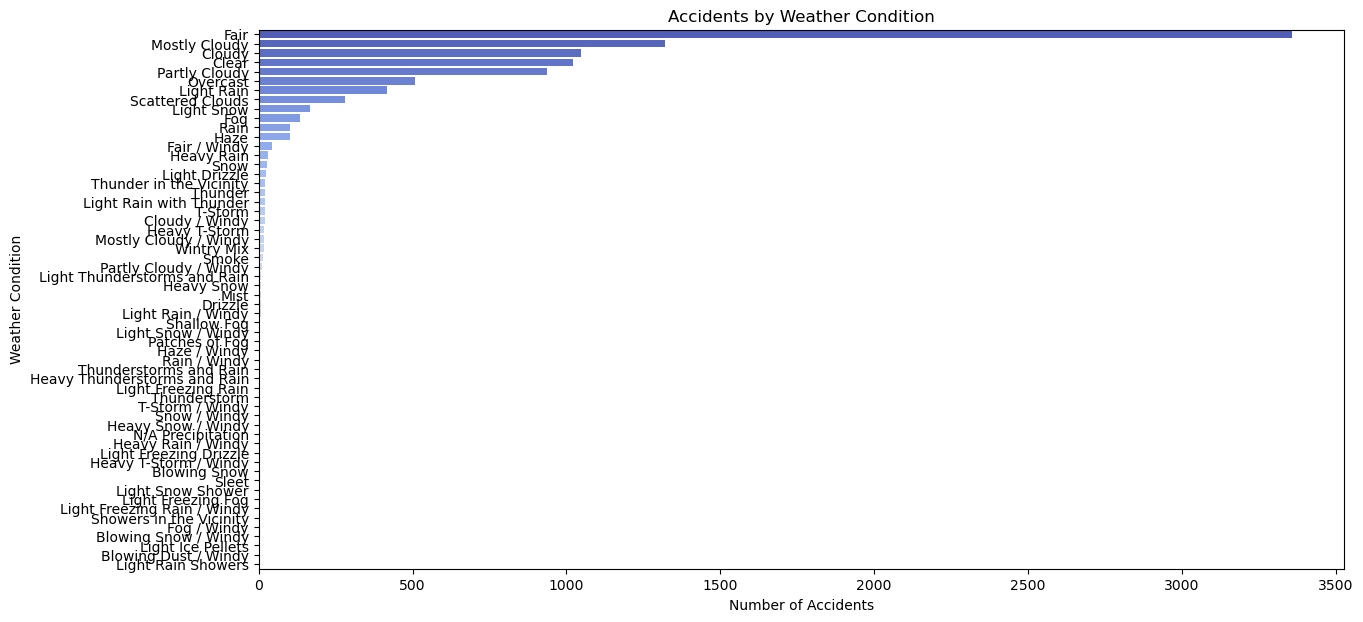

In [52]:


plt.figure(figsize=(14, 7))
sns.countplot(data=data, y='Weather_Condition', palette='coolwarm', order=data['Weather_Condition'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()



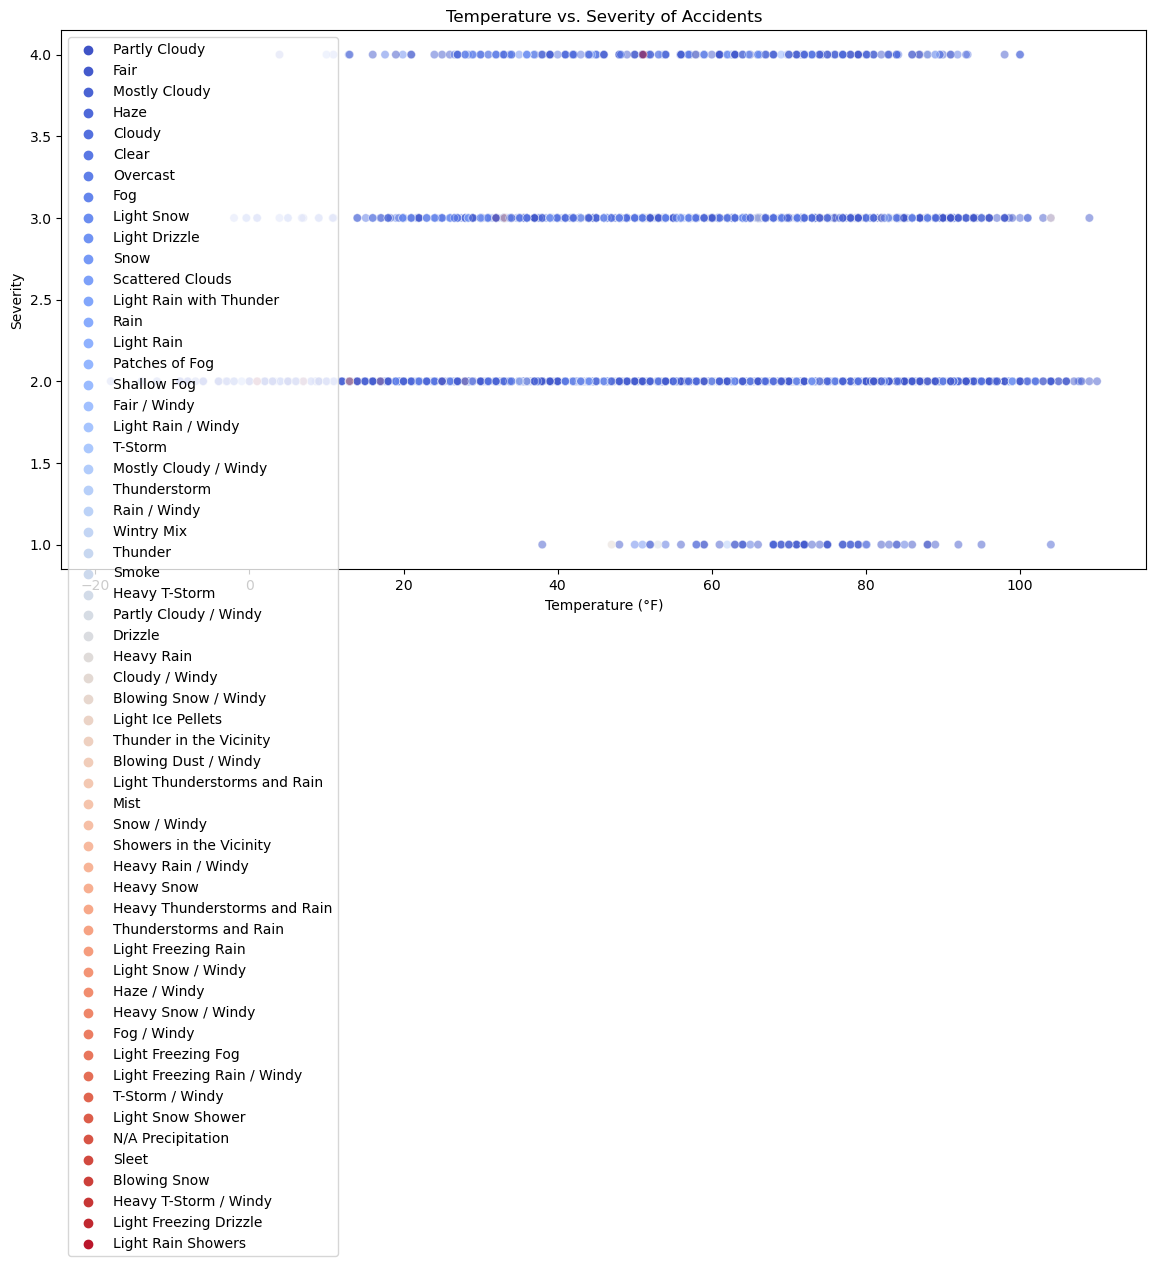

In [53]:


plt.figure(figsize=(14, 7))
sns.scatterplot(data=data, x='Temperature(F)', y='Severity', alpha=0.5, palette='coolwarm', hue='Weather_Condition')
plt.title('Temperature vs. Severity of Accidents')
plt.xlabel('Temperature (°F)')
plt.ylabel('Severity')
plt.legend(loc='best')
plt.show()

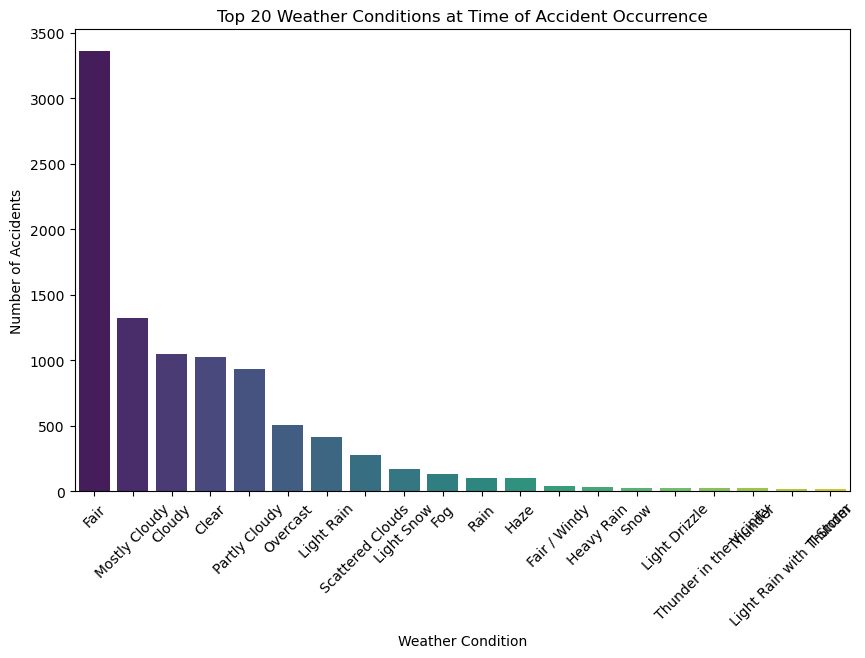

In [54]:

weather_counts = data['Weather_Condition'].value_counts()
top_weather_conditions = weather_counts.sort_values(ascending=False)[:20]


plt.figure(figsize=(10, 6))
sns.barplot(x=top_weather_conditions.index, y=top_weather_conditions.values, palette='viridis')

plt.title('Top 20 Weather Conditions at Time of Accident Occurrence')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')

plt.xticks(rotation=45)
plt.show()



<Axes: xlabel='Severity', ylabel='Start_Lat'>

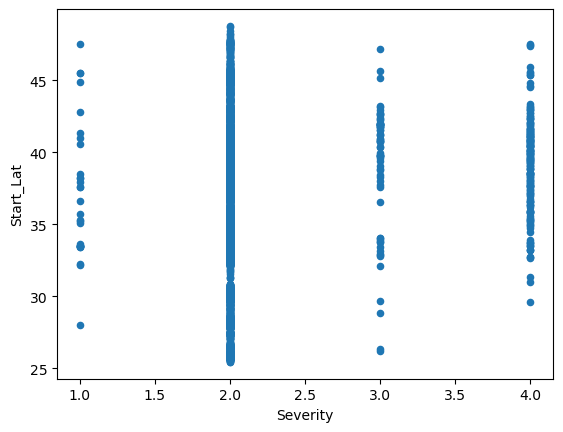

In [55]:
df1.plot(kind='scatter', y='Start_Lat', x='Severity')

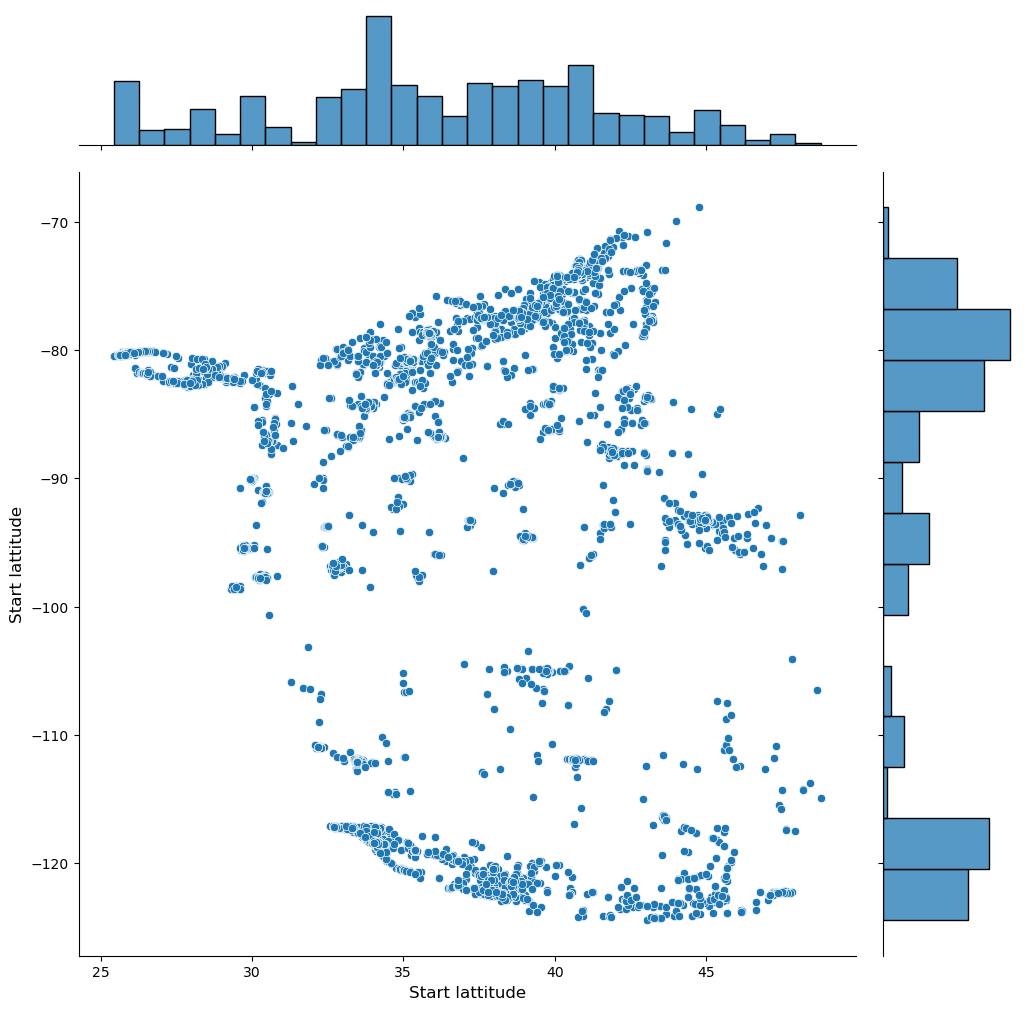

In [56]:
sns.jointplot(x=df1.Start_Lat.values , y=df1.Start_Lng.values,height=10)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()

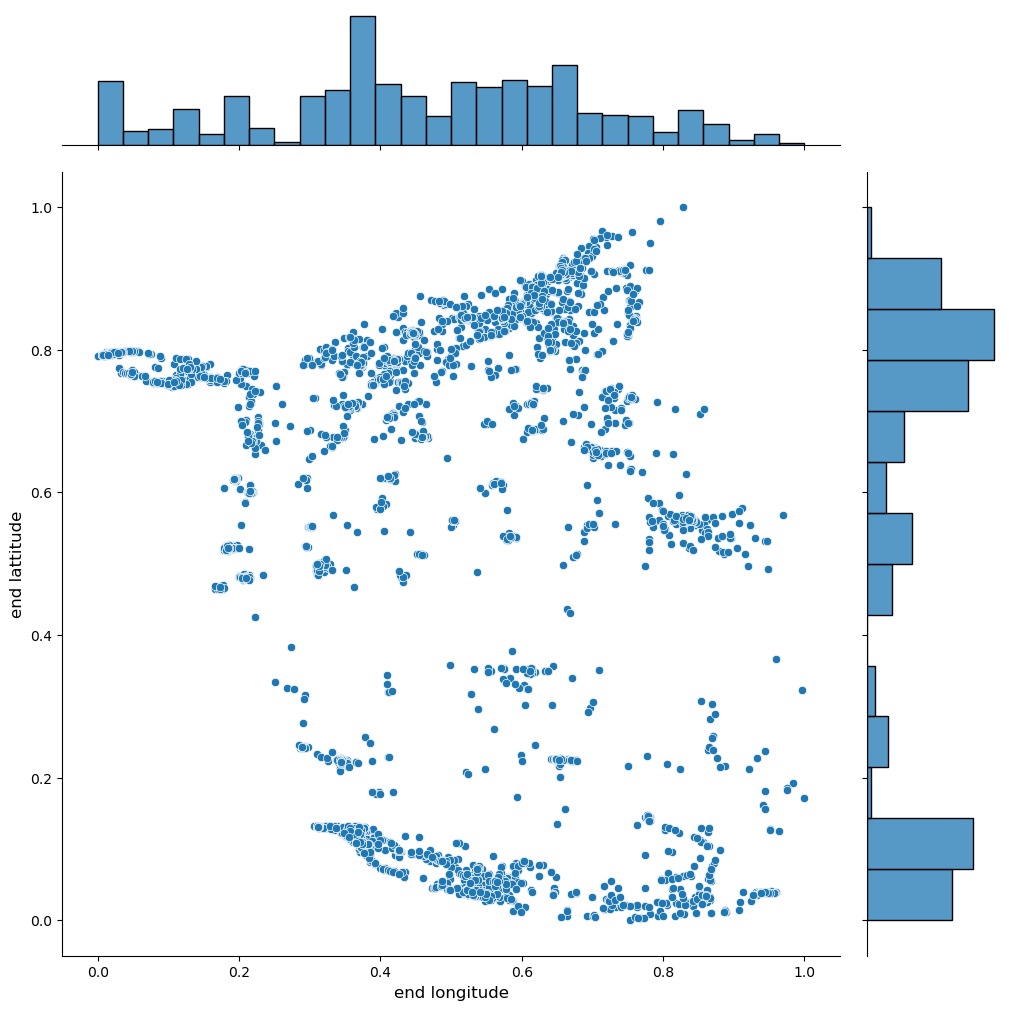

In [57]:
sns.jointplot(x=df1.End_Lat.values , y=df1.End_Lng.values,height=10)
plt.ylabel('end lattitude', fontsize=12)
plt.xlabel('end longitude', fontsize=12)
plt.show()

In [58]:
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[data['Start_Lat'].mean(), data['Start_Lng'].mean()], zoom_start=12, tiles='Stamen Terrain')


heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(m)


m.save('accident_heatmap.html')

print(m)


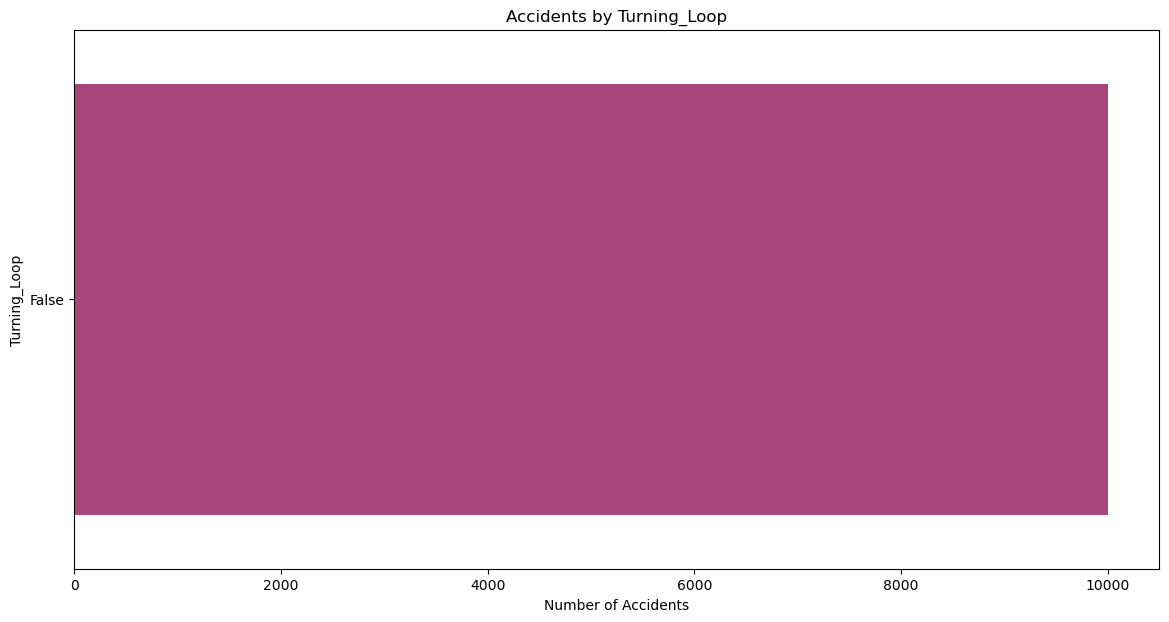

In [59]:
plt.figure(figsize=(14, 7))
sns.countplot(data= data, y='Turning_Loop', palette='magma', order=data['Turning_Loop'].value_counts().index)
plt.title('Accidents by Turning_Loop')
plt.xlabel('Number of Accidents')
plt.ylabel('Turning_Loop')
plt.show()

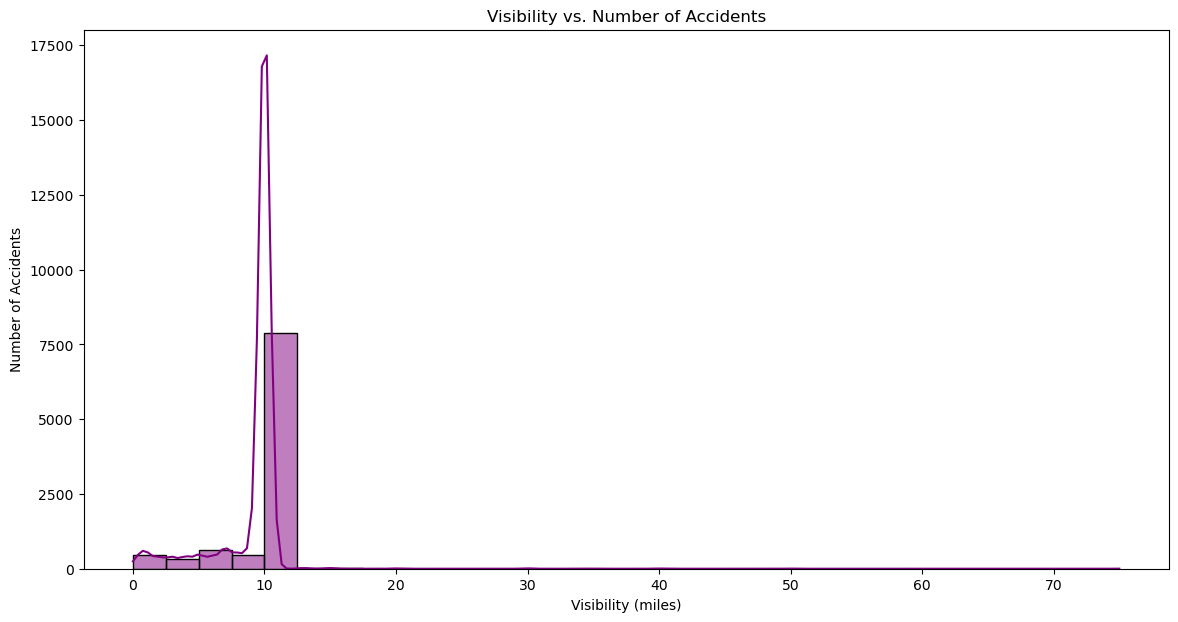

In [60]:
plt.figure(figsize=(14, 7))
sns.histplot(data=data, x='Visibility(mi)', bins=30, kde=True, color='purple')
plt.title('Visibility vs. Number of Accidents')
plt.xlabel('Visibility (miles)')
plt.ylabel('Number of Accidents')
plt.show()

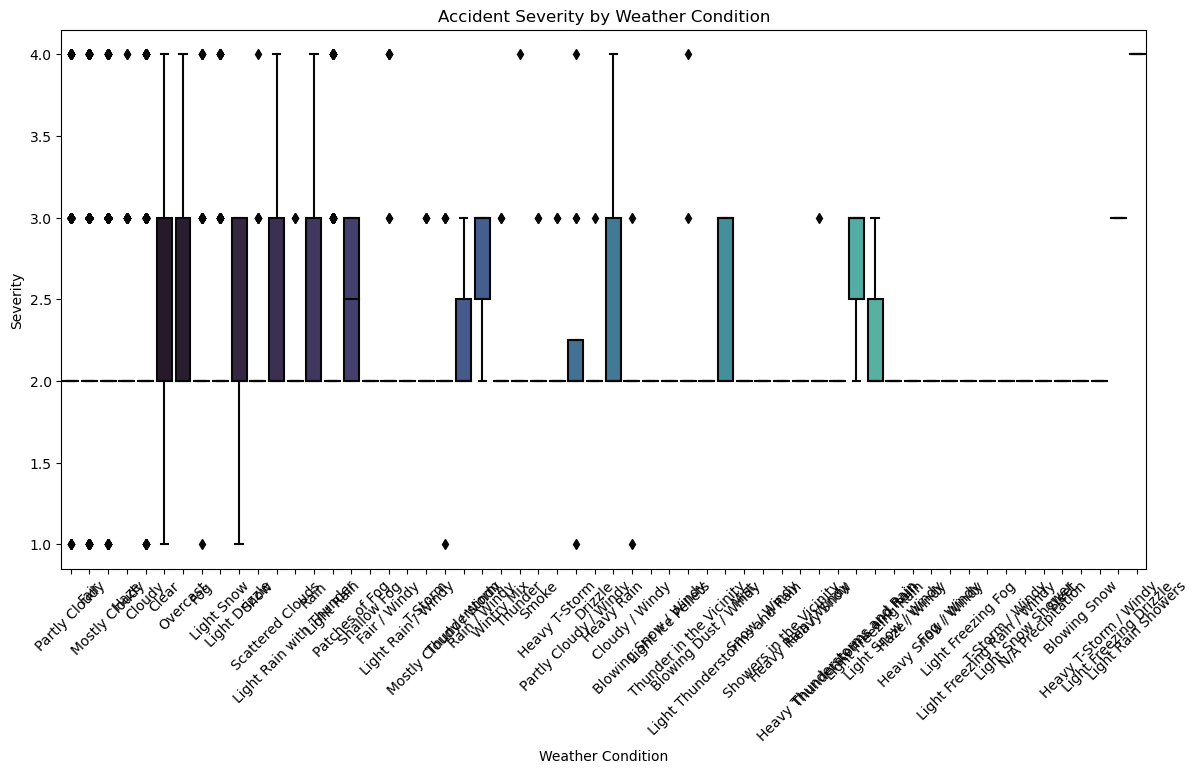

In [61]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Weather_Condition', y='Severity', palette='mako')
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Severity')
plt.xticks(rotation=45)
plt.show()

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Check if 'Weather_Condition' exists and clean column names
df1.columns = df1.columns.str.strip()  # Strip any leading or trailing spaces in column names

# Verify if 'Weather_Condition' exists in the DataFrame
if 'Weather_Condition' in df1.columns:
    # Encode categorical target variable (Weather_Condition) using Label Encoding
    label_encoder = LabelEncoder()
    df1['Weather_Condition'] = label_encoder.fit_transform(df1['Weather_Condition'])
else:
    print("'Weather_Condition' column is missing or has a different name.")
    # Optionally, list all columns to inspect
    print("Available columns:", df1.columns)

# Apply label encoding for other categorical features if they exist
categorical_columns = ['Street', 'City', 'Timezone', 'Airport_Code']  # Add more columns if needed
for col in categorical_columns:
    if col in df1.columns:
        df1[col] = label_encoder.fit_transform(df1[col])
    else:
        print(f"'{col}' column is missing or has a different name.")

# Step 3: Check if 'Weather_Condition' column exists before proceeding
if 'Weather_Condition' in df1.columns:
    # Feature Selection and Data Splitting
    X = df1.drop('Weather_Condition', axis=1)  # Features (excluding target variable)
    y = df1['Weather_Condition']  # Target variable (Weather_Condition)

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 4: Train a Classifier (Random Forest)
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Step 5: Make Predictions and Evaluate the Model
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Detailed classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
else:
    print("The 'Weather_Condition' column is not available for feature extraction.")


'Weather_Condition' column is missing or has a different name.
Available columns: Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       ...
       'Weather_Condition_Snow / Windy', 'Weather_Condition_T-Storm',
       'Weather_Condition_T-Storm / Windy', 'Weather_Condition_Thunder',
       'Weather_Condition_Thunder in the Vicinity',
       'Weather_Condition_Wintry Mix', 'Sunrise_Sunset_Night',
       'Civil_Twilight_Night', 'Nautical_Twilight_Night',
       'Astronomical_Twilight_Night'],
      dtype='object', length=5530)
'Street' column is missing or has a different name.
'City' column is missing or has a different name.
'Timezone' column is missing or has a different name.
'Airport_Code' column is missing or has a different name.
The 'Weather_Condition' column is not available for feature extraction.


The Random Forest algorithm is used in this code for the purpose of predicting the weather condition (Weather_Condition) based on other features in the dataset. In this context, Random Forest is applied as a classification model to determine which weather condition (e.g., "sunny", "rainy", "cloudy", etc.) corresponds to a given set of features (e.g., street, city, airport code, timezone, etc.).

Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00       636

    accuracy                           1.00       636
   macro avg       1.00      1.00      1.00       636
weighted avg       1.00      1.00      1.00       636



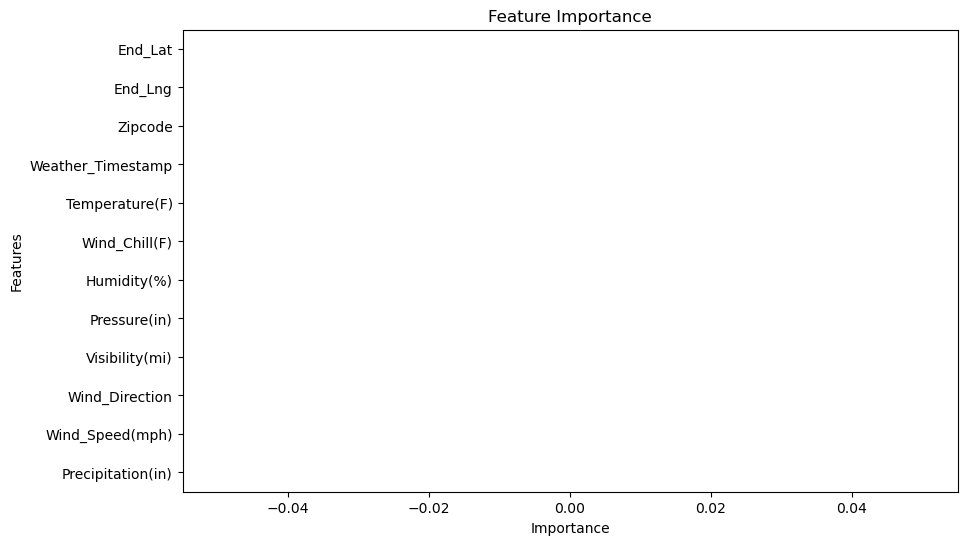

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names
df1.columns = df1.columns.str.strip()

# Define the feature columns (excluding 'Weather_Condition' and target column)
feature_columns = [
    'End_Lat', 'End_Lng', 'Street', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 
    'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
    'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 
    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
]

# Select target variable
target_variable = 'Temperature(F)'

# Step 1: Clean and encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()

# Only apply encoding if the column exists in the dataset
categorical_columns = ['Street', 'City', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 
                       'Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

# Encode only the columns that exist in the dataframe
for col in categorical_columns:
    if col in df1.columns:
        df1[col] = label_encoder.fit_transform(df1[col])
    else:
        print(f"Warning: Column '{col}' not found. Skipping encoding for this column.")

# Step 2: Convert 'Zipcode' or any other columns that are treated as strings to numeric (if applicable)
if 'Zipcode' in df1.columns:
    # You could drop it or encode it if necessary
    df1['Zipcode'] = pd.to_numeric(df1['Zipcode'], errors='coerce')  # Coerce errors to NaN

# Step 3: Filter the feature_columns to include only those present in the DataFrame
available_feature_columns = [col for col in feature_columns if col in df1.columns]

# Step 4: Drop rows with missing values in the target or features
df1 = df1.dropna(subset=[target_variable] + available_feature_columns)

X = df1[available_feature_columns]  # Features
y = df1[target_variable]  # Target

# Step 5: Convert the target variable to a classification-friendly format (e.g., discretizing temperature ranges)
y = pd.cut(y, bins=[-float('inf'), 32, 50, 70, 90, float('inf')], labels=["Low", "Cool", "Warm", "Hot", "Very Hot"])

# Step 6: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = rf_classifier.predict(X_test)

# Step 9: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 10: Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Feature Importance (to understand which features were important in the model)
importances = rf_classifier.feature_importances_
features = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


The main goal of this model is to predict temperature categories using a Random Forest Classifier. The key features in the model are environmental data points like latitude, longitude, weather conditions, and other attributes that influence temperature. By discretizing the target variable (temperature) into categories, the problem becomes a classification task, where the model is trained to predict which temperature category the data falls into.